[0.   0.   0.   0.   0.1  0.44 0.4  0.06 0.  ]


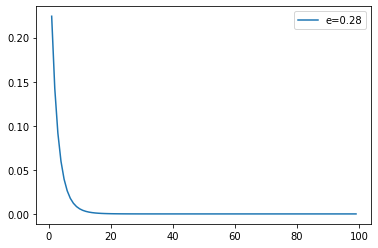

1.0


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import json, math
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter

def get_result(v, num_nodes, run, interval = 1000):
    try:
        with open(f'../res/v{v}_parsed/summary_collision_n{num_nodes}_i{interval}_r{run}.json') as f:
            data = json.load(f)
            return data
    except:
        return {
            'collision_rate': -1
        }

def get_collision_rate_distribution(v, num_nodes, interval, num_runs):
    collision_rate = []
    for i in range(num_runs):
        data = get_result(v, num_nodes, i, interval)
        collision_rate.append(data['collision_rate'])
    collsision_rates = np.array(collision_rate)
    collsision_rates = collsision_rates[collsision_rates > -1]
    return np.histogram(collsision_rates, np.arange(0,1.0, 0.1))

max_tx = 3



(p_collsision_rates, bins) = get_collision_rate_distribution(21, 600, 60, 400)

p_collsision_rates = p_collsision_rates / np.sum(p_collsision_rates)

print(p_collsision_rates)
n = np.arange(1, 100)
p_n_sum = np.zeros(len(n))
i=0

for p_c in np.arange(0.1, 1.0, 0.1):
    p_n = np.power(p_c, n) * (1-p_c)
    p_n_sum += p_n * p_collsision_rates[i]
    i+=1

e = np.sum(p_n_sum[n >= max_tx])
plt.plot(n, p_n_sum, label=f'e={e:.2f}')
plt.legend()
plt.show()

print(np.sum(p_collsision_rates))


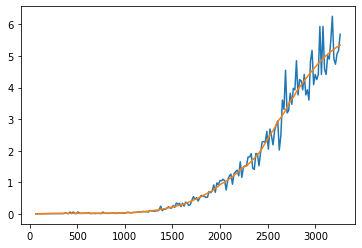

5.087043539279357


In [20]:
excess = []
nn = np.arange(20, 1000, 5)
t_max = 500
for num_nodes in nn:

    (p_collsision_rates, bins) = get_collision_rate_distribution(21, num_nodes, 60, 800)

    p_collsision_rates = p_collsision_rates / np.sum(p_collsision_rates)
    n = np.arange(1, 100)
    p_n_sum = np.zeros(len(n))
    i=0

    for p_c in np.arange(0.1, 1.0, 0.1):
        p_n = np.power(p_c, n-1) * (1-p_c)
        p_n_sum += p_n * p_collsision_rates[i]
        i+=1

    excess_factor = [max(0, (1 - t_max / (ni * 60))) for ni in n]
    
    e = np.sum((p_n_sum * excess_factor))
    excess.append(e)


A = (0.509 * 2.5)**2 * math.pi
factor = 1000 / (60 * A)
positions = nn * factor
plt.plot(positions, np.array(excess) * 100)

yhat = savgol_filter(np.array(excess), 51, 3)
plt.plot(positions, yhat * 100)


#plt.plot(x_fitted, y_fitted * 100)
plt.show()

print(A)

